## The purpose of this file
**Remove search tag** and more node, if necessary, from the original aam to make optimization feasible.<br>
Make an **modified aggregate adjacency matrix** and save it.

In [1]:
import sys
sys.path.append('../')
import powerlaw
import networkx as nx
import toolbox as tb
%matplotlib inline

In [2]:
tag = "starbucks"
hashtag = "スターバックス" # This variable is necessary for data processing in the module 'toolbox'.
timespan = "23-25"
tau = 189
G = nx.read_graphml(f'../data/graph_data/{tag}/original/{hashtag}_{timespan}_{tau}_aam.graphml')

In [3]:
ag = tb.AggregateNetwork(G, tau, hashtag)

In [4]:
ag.tau, ag.searchtag, ag.G.number_of_nodes()

(189, 'スターバックス', 17577)

In [5]:
# Check hubs
ag.check_degree()

isolate:[]


,degree
スターバックス,17576
スタバ,10393
starbucks,8143
starbuckscoffee,3598
スターバックスコーヒー,3243
...,...
misakiicafe,1
愛宕グリーンヒルズ,1
コーヒー牛乳戻ってこないかな,1
妊活中,1


In [6]:
ag.remove_searchtag()

Isolates after removal of the searchtag: 
['うさぎと暮らす', 'misakiicafe', '羽田空港第一ターミナル', 'てぃあらさんと繋がりたい', '同窓会', 'ダークモカチップフラペチーノ🍫\u2061', 'コーヒー牛乳戻ってこないかな', 'シェケラートフレッド', 'バニラビーンラテ', 'spiralgirl', '岐阜タンメン半チャンセット', 'カウンター', '住友林業の平屋', '遠くとも一度は詣れ善光寺', 'OLごはん', 'スターバックスドライブスルー', 'クリスピークリームドーナツ', 'flairespresso', 'ストロベリー何とか', '名古屋則武新町2階店', 'あゆゆのイラスト', '木のかたまり', '妊活中', '愛宕グリーンヒルズ', '神対応', 'rkt_boom', '田町駅']
These isolate nodes are to be removed.
The isolate nodes were successfully deleted.


In [7]:
# Check hubs
ag.check_degree()

isolate:[]


,degree
スタバ,10392
starbucks,8142
starbuckscoffee,3597
スターバックスコーヒー,3242
カフェ,2672
...,...
ドライブデート,1
スタバのメッセージ,1
アイスティ,1
ドリンクチケット利用,1


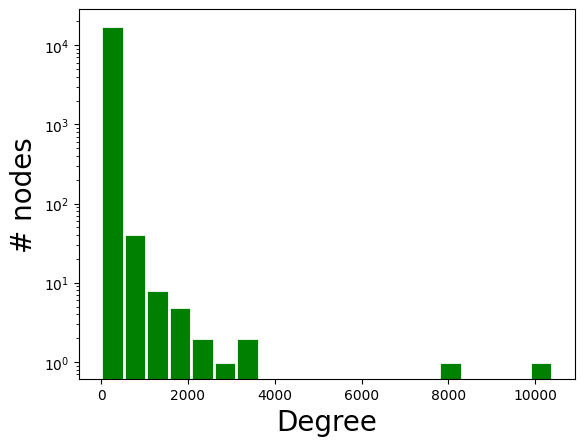

In [8]:
ag.plot_dd(20)

In [9]:
tb.fit_power_law(G)

Calculating best minimal value for power law fit
------------------------------------------------
the fitted parameter alpha: 2.5264330707645866, 
its standard error sigma: 0.0450905422216153, 
k_min: 76.0


(2.5264330707645866, 0.0450905422216153, 76.0)

In [10]:
tb.compare_distribution(G,"power_law", "exponential")

Calculating best minimal value for power law fit
------------------------------------------------
The power_law distribution outperforms exponential distribution with significance level 1.0965350420042182e-05.


In [11]:
tb.compare_distribution(G,"power_law", "lognormal")

Calculating best minimal value for power law fit
------------------------------------------------
The power_law distribution outperforms lognormal distribution with significance level 0.9992374325781235.


In [12]:
# Save figure for future use
fname1 = f"../data/figure/degree_distribution/pdfccdf1_{tag}_{timespan}_{tau}.pdf"
fname2 = f"../data/figure/degree_distribution/pdfccdf2_{tag}_{timespan}_{tau}.pdf"
print(fname1)
print(fname2)

../data/figure/degree_distribution/pdfccdf1_starbucks_23-25_189.pdf
../data/figure/degree_distribution/pdfccdf2_starbucks_23-25_189.pdf


Calculating best minimal value for power law fit
------------------------------------------------
the fitted parameter alpha: 2.5264330707645866, 
its standard error sigma: 0.0450905422216153, 
k_min: 76.0


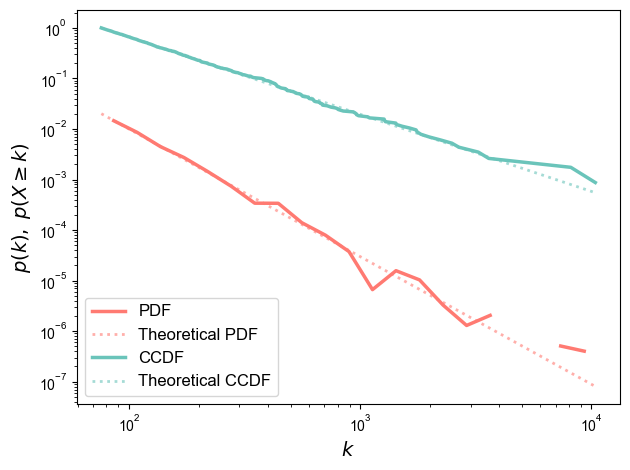

In [13]:
tb.plot_pdf_ccdf(G, Pcolor="#FF7A72", Ccolor="#6AC4BA", fname=fname1)

Calculating best minimal value for power law fit
------------------------------------------------
the fitted parameter alpha: 2.5264330707645866, 
its standard error sigma: 0.0450905422216153, 
k_min: 76.0


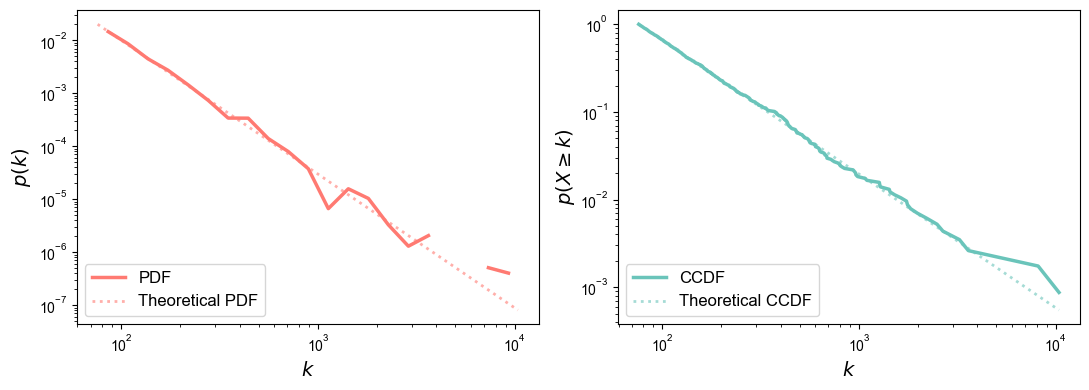

In [14]:
tb.plot_pdf_ccdf(G, sep=True, Pcolor="#FF7A72", Ccolor="#6AC4BA", fname=fname2)

In [15]:
# Save modified aam for statistical test
nx.write_graphml(ag.G, f'../data/graph_data/{tag}/modified/{hashtag}_{timespan}_{tau}_mdaam.graphml', encoding='utf-8')